In [40]:
# Imported all necessary libraries here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import datetime as dt
import pylab 
import scipy.stats as stats
## Display all the columns of the dataframe


# importing sys
import sys
# adding Folder_2 to the system path
sys.path.insert(0, '../Python_module/')
import common_functions as my_module

pd.pandas.set_option('display.max_columns',None)

In [41]:
# Load dataframe into df object.
df = pd.read_csv("cleaned_dataset.csv")

In [42]:
df.head()

,Price,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)
0,8.029348,8.065366,8.065941,8.021558,-3.54,16.0,2.0,2022.0,-0.911602
1,8.065350,7.982515,8.068773,7.976805,8.64,15.0,2.0,2022.0,-0.616112
2,7.982522,7.962437,7.093713,7.949490,2.06,14.0,2.0,2022.0,-0.739736
3,7.962154,7.978366,7.990557,7.950957,-1.61,13.0,2.0,2022.0,-1.193627
4,7.981949,8.030019,8.050809,7.965754,-4.69,11.0,2.0,2022.0,-0.497696


#### Feature Transformation :-
    Feature transformation is the process of  transforming a feature in to a new one with specific funtion.

Let's make various graphs of features with respect to time, so that we can analyze how
features are correlated with time.


In [43]:
my_module.combine_day_month_year(
    df_name=df,
    list_of_day_month_year_columns=['Year','Month','Day'],
)

In [44]:
df.head()

,Price,Open,High,Low,Change %,Day,Month,Year,Volume(In Million),Date
0,8.029348,8.065366,8.065941,8.021558,-3.54,16,2,2022,-0.911602,2022-02-16
1,8.065350,7.982515,8.068773,7.976805,8.64,15,2,2022,-0.616112,2022-02-15
2,7.982522,7.962437,7.093713,7.949490,2.06,14,2,2022,-0.739736,2022-02-14
3,7.962154,7.978366,7.990557,7.950957,-1.61,13,2,2022,-1.193627,2022-02-13
4,7.981949,8.030019,8.050809,7.965754,-4.69,11,2,2022,-0.497696,2022-02-11


In [45]:
df = my_module.drop_column_from_df(
    dataframe_name=df,
    list_column_name=['Day','Month','Year']
)


In [46]:
df.head()

,Price,Open,High,Low,Change %,Volume(In Million),Date
0,8.029348,8.065366,8.065941,8.021558,-3.54,-0.911602,2022-02-16
1,8.065350,7.982515,8.068773,7.976805,8.64,-0.616112,2022-02-15
2,7.982522,7.962437,7.093713,7.949490,2.06,-0.739736,2022-02-14
3,7.962154,7.978366,7.990557,7.950957,-1.61,-1.193627,2022-02-13
4,7.981949,8.030019,8.050809,7.965754,-4.69,-0.497696,2022-02-11


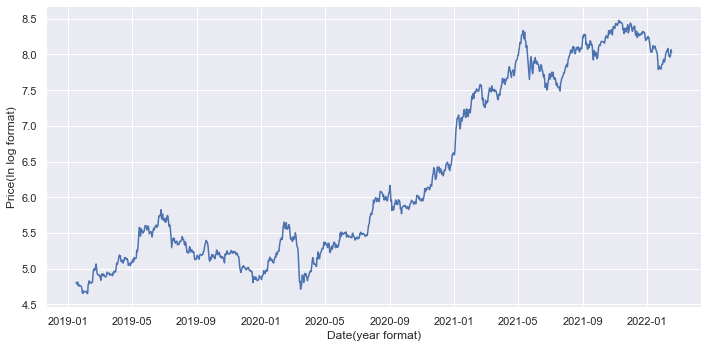

In [47]:
# Time vs Price
my_module.line_graph(
    df_name=df,
    x_axis_column='Date',
    y_axis_column='Price',
    x_axis_title='Date(year format)',
    y_axis_title='Price(In log format)'
    
)

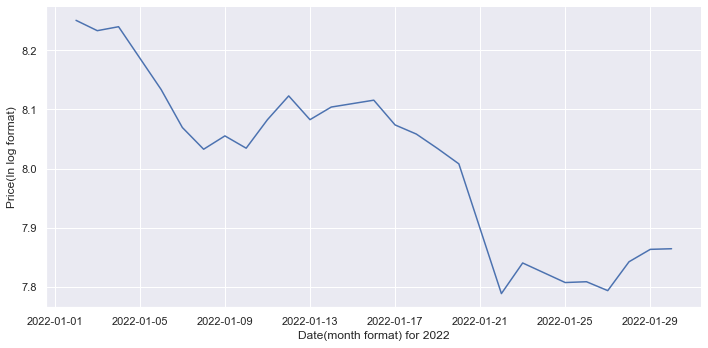

In [48]:
# Time vs Price
my_module.line_graph(
    df_name=df[(df['Date'] > '2022-01-01') & (df['Date'] < '2022-01-31')],
    x_axis_column='Date',
    y_axis_column='Price',
    x_axis_title='Date(month format) for 2022',
    y_axis_title='Price(In log format)'
)

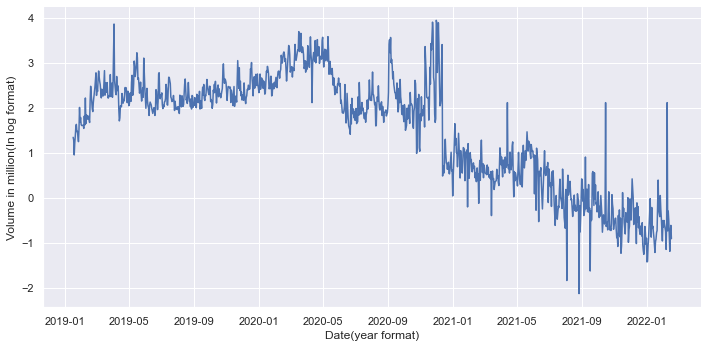

In [49]:
# Time vs Volume
my_module.line_graph(
    df_name=df,
    x_axis_column='Date',
    y_axis_column='Volume(In Million)',
    x_axis_title="Date(year format)",
    y_axis_title='Volume in million(In log format)'
)

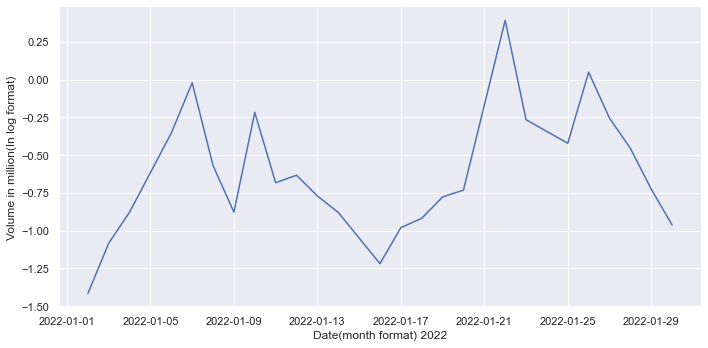

In [50]:
# Time vs Volume
my_module.line_graph(
    df_name=df[(df['Date'] > '2022-01-01') & (df['Date'] < '2022-01-31')],
    x_axis_column='Date',
    y_axis_column='Volume(In Million)',
    x_axis_title="Date(month format) 2022",
    y_axis_title='Volume in million(In log format)'
)

Correlation between features for dimensionality reduction

In [51]:
# my_module.correlation_matrix(df_name=df)

By Analyzing above fig, we can say that Low, High,Open columns are highly correlated with each other so that we can eliminate one of these column in order to reduce our feature dimensionality, however we have very less features right now in our dataset so let's keep it as it is.

In [52]:
# df.to_csv('D:\\Assignement 1\\Data Modeling\\train_test_dataset.csv',index=False)